# **General introduction**
At present, the intrusion detection system is the most developed trend in society. The intrusion detection system acts as a defense tool to detect security attacks which has been increasing steadily in recent years. Therefore, global information security is a very serious problem. As the types of attacks that emerge are constantly changing, there is a need to develop adaptive and flexible security features.
Several studies have suggested that by selecting relevant features for intrusion detection systems, it is possible to considerably improve the detection accuracy and performance of the detection engine. Nowadays with the emergence of new technologies such as Cloud Computing or Big Data, large amounts of network traffic are generated and the intrusion detection system must dynamically collect and analyze the data produced by the incoming traffic. However in a large dataset not all features contribute to represent the traffic, therefore reducing and selecting a number of adequate features may improve the speed and accuracy of the intrusion detection system.
In this project, we try to analyze the NSL-KDD data set with the selected attributes classified in two ways, namely binary classification (attack or not attack).


# **I.Realization**

# **1.Business Understanding**
### *What is cybersecurity ?*
Cyber security is the practice of defending computers, servers, mobile devices, electronic systems, networks, and data from malicious attacks.
### *What is network security ?*
Network security is a set of technologies that protects the usability and integrity of a company’s infrastructure by preventing the entry or proliferation within a network of a wide variety of potential threats.  
### *What is a Cyber attack ?*
Cyberattacks are unwelcome attempts to steal, expose, alter, disable or destroy information through unauthorized access to computer systems.
### *What are network attacks ?*
A network attack is an attempt to gain unauthorized access to an organization’s network, with the objective of stealing data or performing other malicious activity.
There are two main types of network attacks:
* **Passive:** Attackers gain access to a network and can monitor or steal sensitive information, but without making any change to the data, leaving it intact.
* **Active:** Attackers not only gain unauthorized access but also modify data, either deleting, encrypting or otherwise harming it.
### *What is a network intrusion ?*
An unauthorized act of bypassing the security mechanisms of a network or information system. Network intrusions often involve stealing valuable network resources and almost always jeopardize(harm) the security of networks and/or their data.
### *What is a network intrusion detection system?*
* **An intrusion detection system (IDS)** is a software application or hardware device originally built for scanning a network or a system for harmful activity and issues alerts when such activity is discovered.
* **Host-Based IDS (HIDS):** A host-based IDS is deployed on a particular endpoint and designed to protect it against internal and external threats. Such an IDS may have the ability to monitor network traffic to and from the machine, observe running processes, and inspect the system’s logs. A host-based IDS’s visibility is limited to its host machine, decreasing the available context for decision-making, but has deep visibility into the host computer’s internals.
Network-Based IDS (NIDS): A network-based IDS solution is designed to monitor an entire protected network. It has visibility into all traffic flowing through the network and makes determinations based upon packet metadata and contents. This wider viewpoint provides more context and the ability to detect widespread threats; however, these systems lack visibility into the internals of the endpoints that they protect.
### *Detection Method of IDS:*
* **Signature-based Method:** Signature-based IDS detects the attacks on the basis of the specific patterns such as number of bytes or number of 1’s or number of 0’s in the network traffic. It also detects on the basis of the already known malicious instruction sequence that is used by the malware. The detected patterns in the IDS are known as signatures. Signature-based IDS can easily detect the attacks whose pattern (signature) already exists in the system but it is quite difficult to detect the new malware attacks as their pattern (signature) is not known.

* **Anomaly-based Method:** Anomaly-based IDS was introduced to detect unknown malware attacks as new malware are developed rapidly. In anomaly-based IDS there is use of machine learning to create a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in the model. Machine learning-based methods have a better-generalized property in comparison to signature-based IDS as these models can be trained according to the applications and hardware configurations.







#**a.Data extraction**#

In [ ]:
#Read data
Train_df = pd.read_csv(r'KDDTrain+.txt')
Test_df = pd.read_csv(r'KDDTest+.txt')

In [ ]:
#add the column labels
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells'
,'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
,'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate'
,'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

Train_df.columns = columns
Test_df.columns = columns

In [ ]:
Train_df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19


#**b.Data description**#

In [ ]:
#Shape of datsets
print('Training dataset have',Train_df.shape[0],'lines and',Train_df.shape[1],'columns')
print('===================================================')
print('Test dataset have',Test_df.shape[0],'lines and',Test_df.shape[1],'columns')

Training dataset have 125972 lines and 43 columns
Test dataset have 22543 lines and 43 columns


#**c.Data exploration**#

## Data info##

To verify our ideas on the types of feature groups we may find, we look at the summary of our dataframes and number of unique values in their features.

In [ ]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

We can see that the dataset contains mixture of categorical and numerical variables.

Categorical variables have data type object.

Numerical variables have data type float64/int64.

In [ ]:
Train_df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
Test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

Both sets possess only four object/categorical features all with relatively reasonable amounts of levels. Specifically, these features are flag, protocol_type, service and attack.

**We also see two concerns:**

There is some degree of mismatch in the levels of the service and attack features between our testing set and training set.
We will need to reconcile these disparities somehow, especially if we do one-hot encoding, to maintain dimensional fidelity during model training and predicting.

Both sets contain certain integer features with large ranges. Specifically, these features are:
(**duration,src_bytes,dst_bytes,hot,num_compromised,num_root,count,srv_count,dst_host_count,dst_host_srv_count etc..**)

Numeric Rate Features: Features with _rate as a tail seem to be float values ranging from 0 to 1.0, obviously signifying the rate of something they respectively represent. As these features are in a benchmark dataset, we will assume that these will not need much, if any, touch-up.

##Null values##

In [ ]:
#checking null values in training set
Train_df.isnull().values.sum()

0

In [ ]:
#checking null values in test set
Test_df.isnull().values.sum()

0

##Duplication##

In [ ]:
#checking duplicated rows in training set
Train_df.duplicated().sum()

0

In [ ]:
#checking duplicated rows in test set
Train_df.duplicated().sum()

0

##Value types##

In [ ]:
Train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

##Analyzing categorical variables##

###Training set###

In [ ]:
#Categorical variables distribution in Training dataset
Train_df[[c for c in Train_df.columns if c not in Train_df.describe().columns]].astype('category').describe()

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


####Values description(rapport)####

In [ ]:
Train_df["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [ ]:
Train_df["protocol_type"].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [ ]:
Train_df["service"].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
Train_df["attack"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

###Test set###

In [ ]:
#Categorical variables distribution in Test dataset
Test_df[[c for c in Test_df.columns if c not in Test_df.describe().columns]].astype('category').describe()

,protocol_type,service,flag,attack
count,22543,22543,22543,22543
unique,3,64,11,38
top,tcp,http,SF,normal
freq,18879,7853,14875,9711


####Values description(rapport)####

In [ ]:
Test_df["flag"].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [ ]:
Test_df["protocol_type"].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [ ]:
Test_df["service"].unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'], dtype=object)

In [ ]:
Test_df["attack"].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

##Global vizualisation/overview##

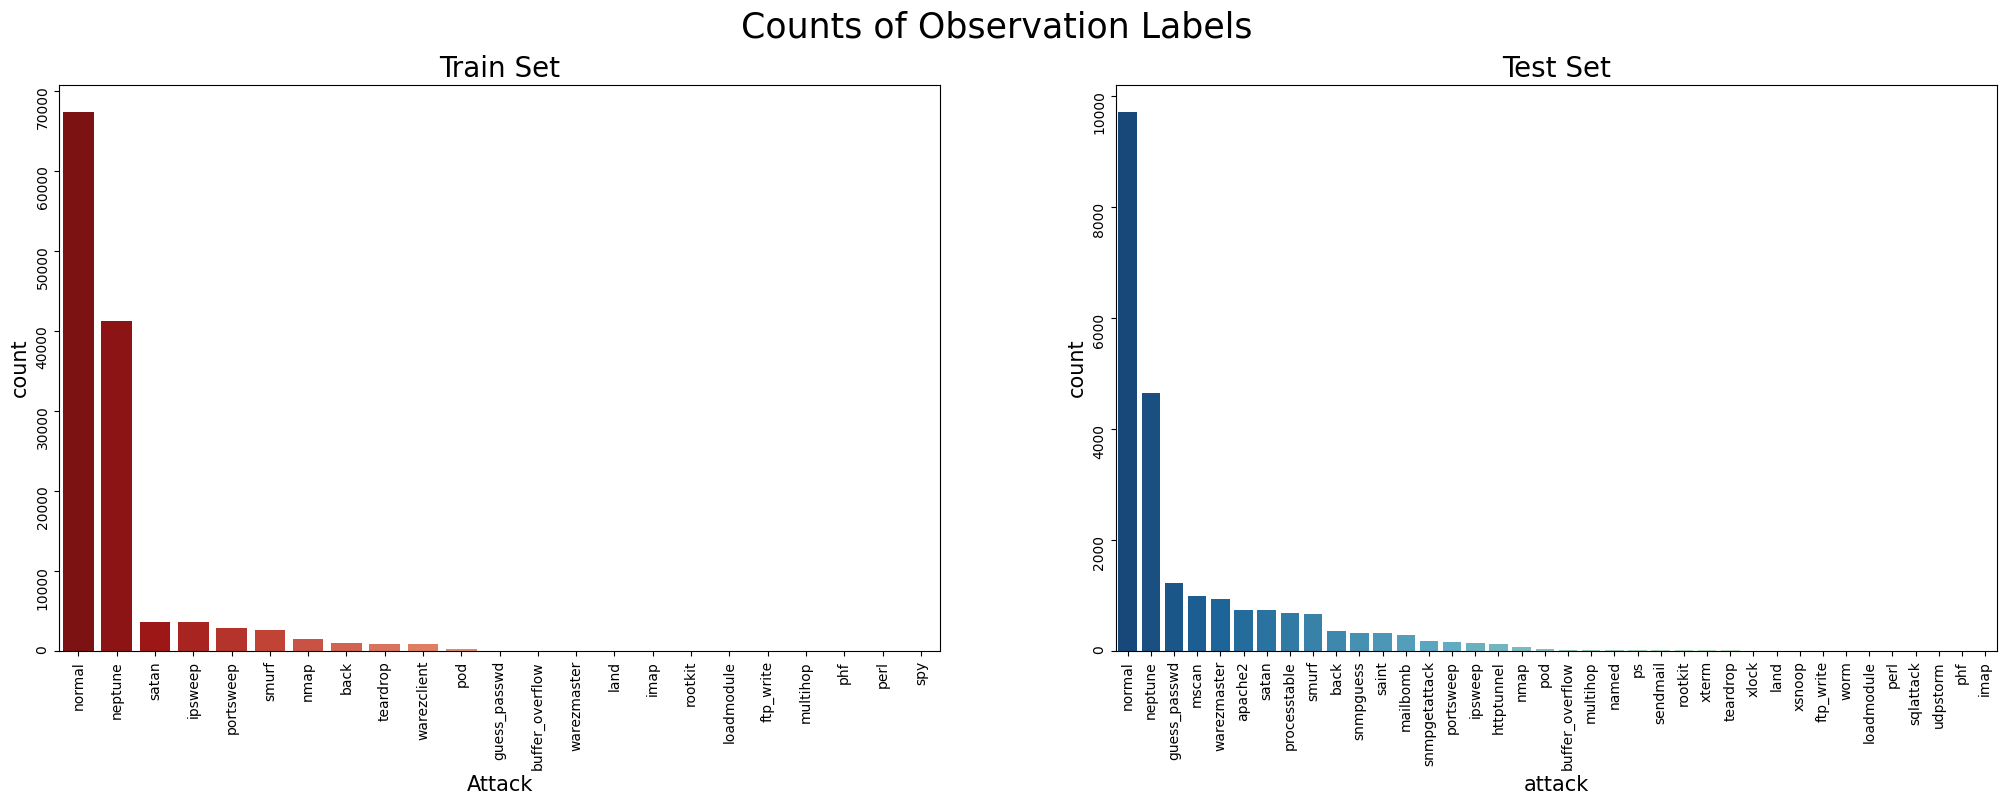

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="attack",
            palette="OrRd_r",
            data=Train_df,
            order=Train_df['attack'].value_counts().index,
            ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('Attack', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="attack",
            palette="GnBu_r",
            data=Test_df,
            order=Test_df['attack'].value_counts().index,
            ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('attack', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

Immediately we see that we have a significant skew in our data, which is mostly observations of normal behavior and neptune attacks.

When we do our preprocessing, we will downsample these observations so that we use a number more inline with number of other types of attacks in our dataset.

####Breakdown of the different subclasses of each variable (Trainsing set)####

**Univariate Analysis**

#####Attack#####

In [ ]:
Train_df['attack_check'] = np.where(Train_df['attack']!= 'normal', 1, 0)
Train_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0


In [ ]:
Train_df['attack_type'] = np.where(Train_df['attack']!= 'normal', 'attack', 'normal')
Train_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,normal


In [ ]:
def bar_graph(feature):
  Train_df[feature].value_counts().plot(kind="bar")

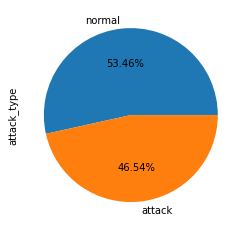

In [ ]:
round(Train_df["attack_type"].value_counts()/Train_df.shape[0]*100,2).plot.pie(autopct="%1.2f%%")
#fig = px.pie(data_frame=Train_df,values=Train_df.attack_type.value_counts().values, names=Train_df.attack_type.value_counts().index, color_discrete_sequence=px.colors.qualitative.Set1)
#fig.update_traces(textposition='inside', textinfo='percent+label',)

#fig.show()

In our training set, normal connections are more frequent than attacks with a percentage of 53.46%

In [ ]:
print('Attack distribution in Training set:')
rp.summary_cat(Train_df["attack"])

Attack distribution in Training set:


,Variable,Outcome,Count,Percent
0,attack,normal,67342,53.46
1,,neptune,41214,32.72
2,,satan,3633,2.88
3,,ipsweep,3599,2.86
4,,portsweep,2931,2.33
5,,smurf,2646,2.10
6,,nmap,1493,1.19
7,,back,956,0.76
8,,teardrop,892,0.71
9,,warezclient,890,0.71


From the table above we can classify attacks into 4 subclasses : **Dos, Probe, U2R and R2L**

**To better visualize their distribution, let's create a new column 'Class' that aggregates the attacks**

In [ ]:
def conditions(s):
  if(s['attack'] =='back') | (s['attack'] =='neptune') | (s['attack'] =='land') | (s['attack'] =='pod') | (s['attack'] =='smurf') | (s['attack'] =='teardrop') | (s['attack'] =='worm') :
    return 'Dos'
  elif(s['attack'] =='ipsweep') | (s['attack'] =='mscan') | (s['attack'] =='nmap') | (s['attack'] =='portsweep') | (s['attack'] =='saint') | (s['attack'] =='satan') :
    return 'Probe'
  elif(s['attack'] =='buffer_overflow') | (s['attack'] =='loadmodule') | (s['attack'] =='perl') | (s['attack'] =='rootkit'):
    return 'U2R'
  elif(s['attack'] =='warezmaster') | (s['attack'] =='phf') | (s['attack'] =='spy') | (s['attack'] =='guess_passwd') | (s['attack'] =='ftp_write') | (s['attack'] =='multihop')| (s['attack'] =='warezclient')| (s['attack'] =='imap') :
    return 'R2L'
  else:
    return 'normal'



In [ ]:
Train_df['Class'] = Train_df.apply(conditions, axis=1)
Train_df.head(2)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check,attack_type,Class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal,15,0,normal,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,neptune,19,1,attack,Dos


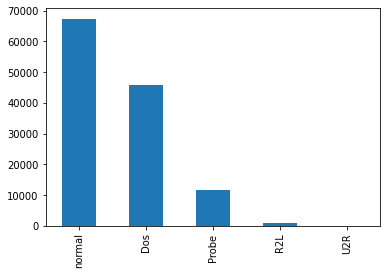

In [ ]:
bar_graph('Class')

In [ ]:
print('Attack categories distribution in Training set:')
rp.summary_cat(Train_df["Class"])

Attack categories distribution in Training set:


,Variable,Outcome,Count,Percent
0,Class,normal,67342,53.46
1,,Dos,45927,36.46
2,,Probe,11656,9.25
3,,R2L,995,0.79
4,,U2R,52,0.04


-Most of the connections are normal, but we can also see that the major of attacks are Dos attacks with a percentage of 36.46%.

-U2R is the least frequent attack

#####Service#####

In [ ]:
#Discovering the diffrent values of service attribute and their percentages
rp.summary_cat(Train_df["service"])

,Variable,Outcome,Count,Percent
0,service,http,40338,32.02
1,,private,21853,17.35
2,,domain_u,9043,7.18
3,,smtp,7313,5.81
4,,ftp_data,6859,5.44
...,...,...,...,...
65,,tftp_u,3,0.00
66,,http_8001,2,0.00
67,,aol,2,0.00
68,,harvest,2,0.00


**The last categories are less frequent in our records, let's focus on only 20 categories**

In [ ]:
services_frequency = Train_df['service'].value_counts()
subsetServices= list(services_frequency[:20].index)
services_frequency

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

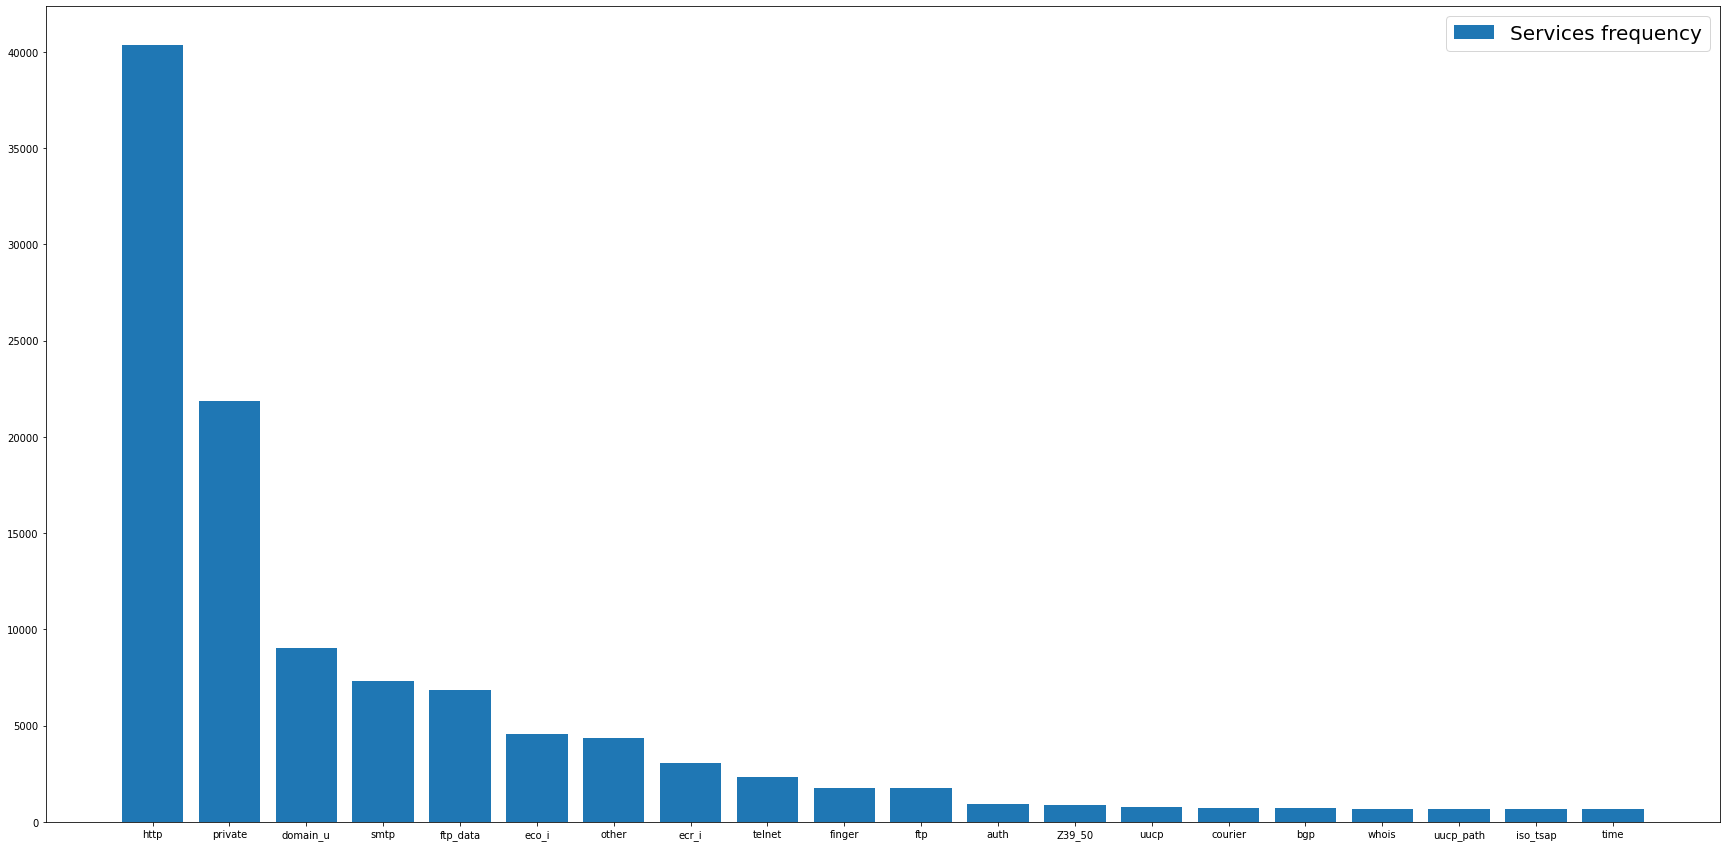

In [ ]:
f, ax = plt.subplots(figsize=(30,15)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:20], label = 'Services frequency')
ax.legend(fontsize = 20)

Approximately 32% of all services are http and which is legitimate since it is the most used application-layer protocol for transmitting hypermedia documents, such as HTML.

≈17% represents the private service.(à verifier est ce que https wale)

≈51% are distributed over the remaining 68 services.

#####Protocol_type#####

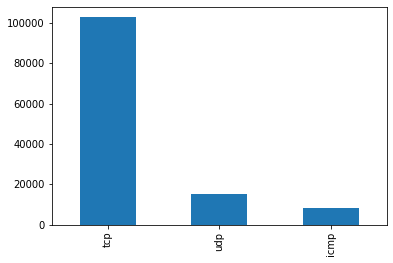

In [ ]:
bar_graph('protocol_type')

In [ ]:
#Discovering the diffrent values of protocol_type attribute and their percentages
rp.summary_cat(Train_df["protocol_type"])

,Variable,Outcome,Count,Percent
0,protocol_type,tcp,102688,81.52
1,,udp,14993,11.90
2,,icmp,8291,6.58


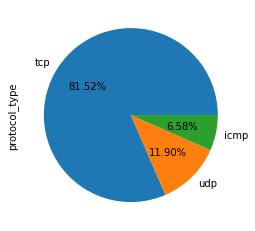

In [ ]:
round(Train_df["protocol_type"].value_counts()/Train_df.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

81.52% of all connections use TCP, which is legitimate since it ensures error-checking and delivery of data packets.

The UDP and ICMP protocols are present in low percentages, respectively 11.90% and 6.58%
With UDP, the data received may be incomplete, unordered or not received at all.The protocol by itself does not provide any mechanism to prevent or detect this neither on the sender or receiver sides which made TCP more reliable.

Data between systems is not typically exchanged using ICMP, unlike transport protocols such as TCP and UDP. ICMP is mainly used to report data transmission errors and diagnose network problems.


#####Flag#####

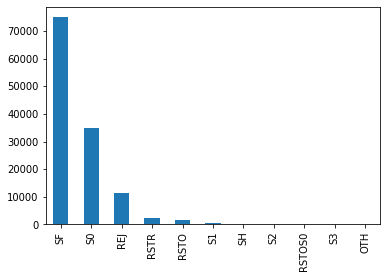

In [ ]:
bar_graph('flag')

In [ ]:
#Discovering the diffrent values of flag attribute and their percentages
rp.summary_cat(Train_df["flag"])

,Variable,Outcome,Count,Percent
0,flag,SF,74944,59.49
1,,S0,34851,27.67
2,,REJ,11233,8.92
3,,RSTR,2421,1.92
4,,RSTO,1562,1.24
5,,S1,365,0.29
6,,SH,271,0.22
7,,S2,127,0.10
8,,RSTOS0,103,0.08
9,,S3,49,0.04


Approximately 59% of connections are with SF status.This is a reasonaible percentage because in real world, most of connections are normally established and terminated and.
28% of connections are with S0 status which means that the connection is attempt seen with no reply.
The remaining 13% represents connection status that reflects packet transmission problems

####Breakdown of the different subclasses of each variable (Test set)####

**Univariate Analysis**

#####Attack#####

In [ ]:
Test_df['attack_check'] = np.where(Test_df['attack']!= 'normal', 1, 0)
Test_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.0,0.0,saint,15,1


In [ ]:
Test_df['attack_type'] = np.where(Test_df['attack']!= 'normal', 'attack', 'normal')
Test_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,1,attack
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.0,0.0,0.0,0.0,normal,21,0,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.0,0.0,0.0,0.0,saint,15,1,attack


In [ ]:
def bar_graph(feature):
  Test_df[feature].value_counts().plot(kind="bar")

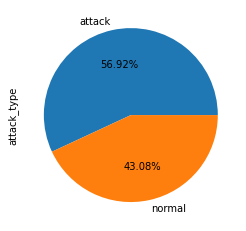

In [ ]:
round(Test_df["attack_type"].value_counts()/Test_df.shape[0]*100,2).plot.pie(autopct="%1.2f%%")
#fig = px.pie(data_frame=Train_df,values=Train_df.attack_type.value_counts().values, names=Train_df.attack_type.value_counts().index, color_discrete_sequence=px.colors.qualitative.Set1)
#fig.update_traces(textposition='inside', textinfo='percent+label',)

#fig.show()

In our test set, attacks are more frequent than normal connections with a percentage of 56.92%

In [ ]:
print('Attack distribution in Test set:')
rp.summary_cat(Test_df["attack"])

Attack distribution in Test set:


,Variable,Outcome,Count,Percent
0,attack,normal,9711,43.08
1,,neptune,4656,20.65
2,,guess_passwd,1231,5.46
3,,mscan,996,4.42
4,,warezmaster,944,4.19
5,,apache2,737,3.27
6,,satan,735,3.26
7,,processtable,685,3.04
8,,smurf,665,2.95
9,,back,359,1.59


From the table above we can classify attacks into 4 subclasses : **Dos, Probe, U2R and R2L**

**To better visualize their distribution, let's create a new column 'Class' that aggregates the attacks**

In [ ]:
def conditions(s):
  if (s['attack'] =='apache2')|(s['attack'] =='processtable') |(s['attack'] =='udpstorm')| (s['attack'] =='mailbomb') | (s['attack'] =='back') | (s['attack'] =='neptune') | (s['attack'] =='land') | (s['attack'] =='pod') | (s['attack'] =='smurf') | (s['attack'] =='teardrop') | (s['attack'] =='worm') :
    return 'Dos'
  elif(s['attack'] =='ipsweep') | (s['attack'] =='mscan') | (s['attack'] =='nmap') | (s['attack'] =='portsweep') | (s['attack'] =='saint') | (s['attack'] =='satan') :
    return 'Probe'
  elif (s['attack'] =='ps')|(s['attack'] =='sqlattack')| (s['attack'] =='xterm')| (s['attack'] =='buffer_overflow') | (s['attack'] =='loadmodule') | (s['attack'] =='perl') | (s['attack'] =='rootkit') |(s['attack'] =='httptunnel'):
    return 'U2R'
  elif (s['attack'] =='xsnoop')|(s['attack'] =='xlock')|(s['attack'] =='snmpguess')| (s['attack'] =='snmpgetattack')| (s['attack'] =='sendmail')| (s['attack'] =='named')|(s['attack'] =='warezmaster') | (s['attack'] =='phf') | (s['attack'] =='spy') | (s['attack'] =='guess_passwd') | (s['attack'] =='ftp_write') | (s['attack'] =='multihop')| (s['attack'] =='warezclient')| (s['attack'] =='imap') :
    return 'R2L'
  else:
    return 'normal'



In [ ]:
Test_df['Class'] = Test_df.apply(conditions, axis=1)
Test_df.head(2)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check,attack_type,Class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.0,0.0,1.0,1.0,neptune,21,1,attack,Dos
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,normal,21,0,normal,normal


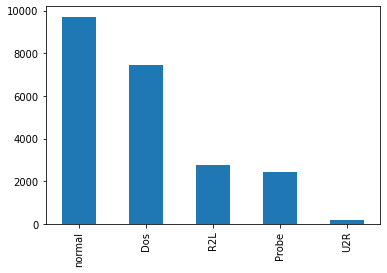

In [ ]:
bar_graph('Class')

In [ ]:
print('Attack categories distribution in Test set:')
rp.summary_cat(Test_df["Class"])

Attack categories distribution in Test set:


,Variable,Outcome,Count,Percent
0,Class,normal,9711,43.08
1,,Dos,7459,33.09
2,,R2L,2752,12.21
3,,Probe,2421,10.74
4,,U2R,200,0.89


-Most of the connections are normal, but we can also see that the major of attacks are Dos attacks with a percentage of 33.09%.

-U2R is the least frequent attack

#####Service#####

In [ ]:
#Discovering the diffrent values of service attribute and their percentages
rp.summary_cat(Test_df["service"])

,Variable,Outcome,Count,Percent
0,service,http,7853,34.84
1,,private,4773,21.17
2,,telnet,1626,7.21
3,,pop_3,1019,4.52
4,,smtp,934,4.14
...,...,...,...,...
59,,printer,11,0.05
60,,ntp_u,10,0.04
61,,rje,8,0.04
62,,tim_i,6,0.03


**The last categories are less frequent in our records, let's focus on only 20 categories**

In [ ]:
services_frequency_test = Test_df['service'].value_counts()
subsetServices_test= list(services_frequency_test[:20].index)
services_frequency_test

http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

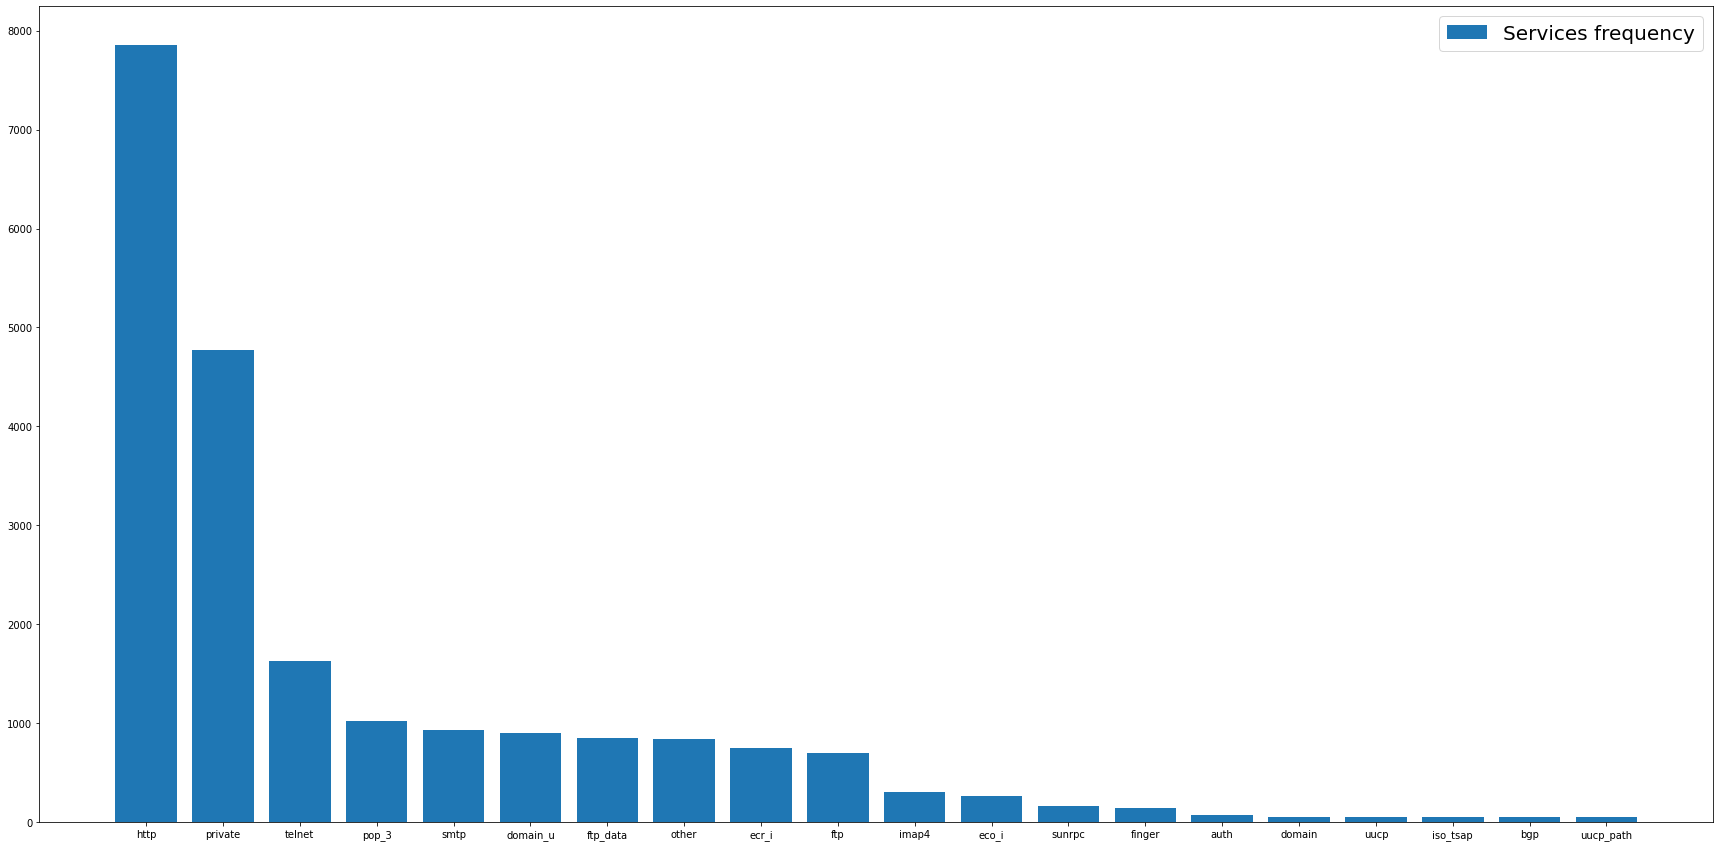

In [ ]:
f, ax = plt.subplots(figsize=(30,15)) # set the size that you'd like (width, height)
plt.bar(subsetServices_test, services_frequency_test[:20], label = 'Services frequency')
ax.legend(fontsize = 20)

Approximately 35% of all services are http and which is legitimate since it is the most used application-layer protocol for transmitting hypermedia documents, such as HTML.

≈22% represents the private service.(à verifier est ce que https wale)

≈43% are distributed over the remaining 62 services.

#####Protocol_type#####

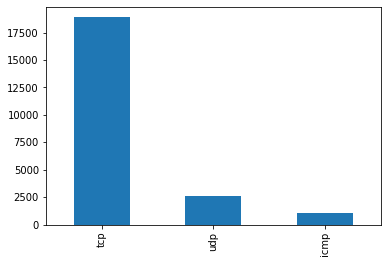

In [ ]:
bar_graph('protocol_type')

In [ ]:
#Discovering the diffrent values of protocol_type attribute and their percentages
rp.summary_cat(Test_df["protocol_type"])

,Variable,Outcome,Count,Percent
0,protocol_type,tcp,18879,83.75
1,,udp,2621,11.63
2,,icmp,1043,4.63


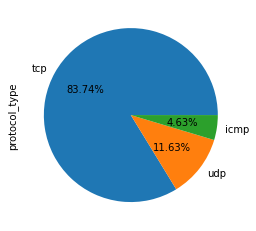

In [ ]:
round(Test_df["protocol_type"].value_counts()/Test_df.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

83.74% of all connections use TCP, which is legitimate since it ensures error-checking and delivery of data packets.

The UDP and ICMP protocols are present in low percentages, respectively 11.63% and 4.63%
With UDP, the data received may be incomplete, unordered or not received at all.The protocol by itself does not provide any mechanism to prevent or detect this neither on the sender or receiver sides which made TCP more reliable.

Data between systems is not typically exchanged using ICMP, unlike transport protocols such as TCP and UDP. ICMP is mainly used to report data transmission errors and diagnose network problems.


#####Flag#####

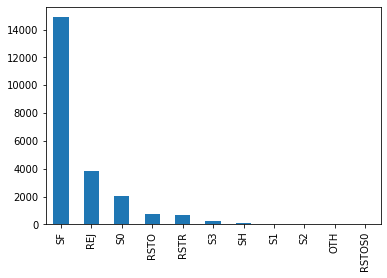

In [ ]:
bar_graph('flag')

In [ ]:
#Discovering the diffrent values of flag attribute and their percentages
rp.summary_cat(Test_df["flag"])

,Variable,Outcome,Count,Percent
0,flag,SF,14875,65.99
1,,REJ,3849,17.07
2,,S0,2013,8.93
3,,RSTO,773,3.43
4,,RSTR,669,2.97
5,,S3,249,1.10
6,,SH,73,0.32
7,,S1,21,0.09
8,,S2,15,0.07
9,,OTH,4,0.02


Approximately 66% of connections are with SF status.This is a reasonaible percentage because in real world, most of connections are normally established and terminated and.

17% of connections are with REJ status which means that the connection has been rejected
The remaining 17% represents connection status that reflects packet transmission problems

###Discovering interrelationships (Bivariate analysis_Training set)###

####Cross tables/Khi square Test/Cramer Test####
**A frequency table is a simple but effective way of finding distribution between two categorical variables.crosstab() function is used to create the two-way table between two variables**
To test whether the insight from the crosstab is statistically significant or not, we use the chi-square test of independence.
**The chi-square test of independence is used to determine whether there is an association between two or more categorical variables.**

**Cramer is a measure of the strength of the relationship**      
Cramer's Interpretation
>0.5 strong association , 0.3 to 0.5 moderate association,
0.1 to .3 low association, 0 to 0.1 little if any association.


#####Attack vs Protocol_type

In [ ]:
attack_protocol= pd.crosstab(Train_df.protocol_type,Train_df.attack,margins=True, margins_name = 'Total').T.style.background_gradient(cmap='summer_r')
attack_protocol

protocol_type,icmp,tcp,udp,Total
attack,,,,
back,0,956,0,956
buffer_overflow,0,30,0,30
ftp_write,0,8,0,8
guess_passwd,0,53,0,53
imap,0,11,0,11
ipsweep,3117,482,0,3599
land,0,18,0,18
loadmodule,0,9,0,9
multihop,0,7,0,7


In [ ]:
#use a crosstab to get attack vs protocol
#attack_vs_protocol = pd.crosstab(Train_df.attack, Train_df.protocol_type,margins=True, margins_name = 'Total')
#attack_vs_protocol

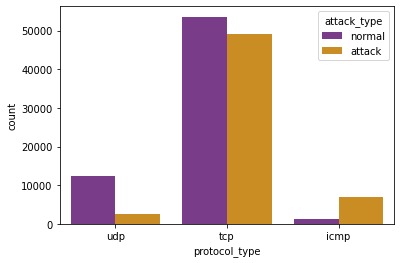

In [ ]:
sns.countplot(x='protocol_type',hue='attack_type' , data = Train_df , palette ='CMRmap')

**-** we can see that tcp has almost the same amount in attack & normal compared with its counts.

**-** we can see that icmp is attacked the most compared with its counts.
**-** we can that see udp is more normal attack compared with its counts.

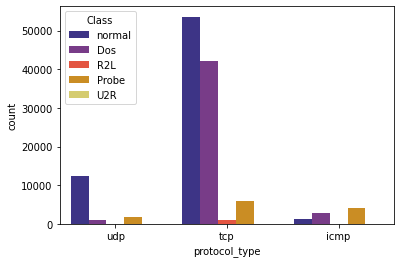

In [ ]:
sns.countplot(x='protocol_type',hue='Class' , data = Train_df , palette ='CMRmap')

In [ ]:
attack_protocol= pd.crosstab(Train_df.protocol_type,Train_df.Class,margins=True, margins_name = 'Total').T.style.background_gradient(cmap='summer_r')
attack_protocol

protocol_type,icmp,tcp,udp,Total
Class,,,,
Dos,2847,42188,892,45927
Probe,4135,5857,1664,11656
R2L,0,995,0,995
U2R,0,49,3,52
normal,1309,53599,12434,67342
Total,8291,102688,14993,125972


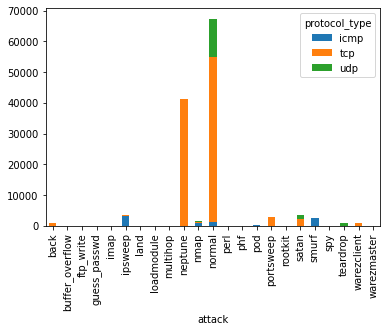

In [ ]:
pd.crosstab(Train_df.attack, Train_df.protocol_type).plot.bar(stacked=True)


**-** We notice that the most used protocol in normal connections is TCP follwed by UDP.
**-** ICMP is used less frequently in normal connections due to less error reporting

**-**Most attacks target the TCP protocol, which makes us suppose that TCP has security problems.

**-** We notice that udp and icmp are less targeted by attacks.
We can assume that UDP and ICMP are at risk but less vulnerable to abuse than TCP

**-** Most attacks are going to target a specific protocol but we can perceive that there are 2 attacks (satan, nmap) that are cross-prototcol.
**=>** cross protocols are smart attacks that make it possible for attackers to get access to very sensitive information like passwords, emails and financial data (a verifier)

**-**Neptune attacks can make memory resources too full for a victim by sending a TCP packet requesting to initiate a TCP session.This packet is part of a three-way handshake that is needed to establish a TCP connection between two hosts.

This explains the high number of neptune attacks via only the tcp protocol


**-**icmp is less used in normal attacks but more targeted by attacks.
from the bar chart we can see that probe and dos attacks target icmp protocl.(referring to the cross table of protocol_type vs attack_type we have 4135 probe attacks and 2847 dos attacks)

The 2 frequent icmp attacks are ipsweep from the probe category and smurf from the dos category with a total of 3117 and 2646 respectively.

**=>**To better understand why this occurs let's define these two attacks briefly:

**-**A Smurf attack is a form of (DDoS) attack that renders computer networks inoperable.it accomplishes this by exploiting vulnerabilities of ICMP.

**-**IP sweep also known as ICMP sweep attack occurs when the attacker sends ICMP echo requests to multiple destination addresses. If a target host replies to these requests, the reply reveals the targets IP address to the attacker.



In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["attack"], Train_df["protocol_type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 44.0) =,110961.3612
1,p-value =,0.0000
2,Cramer's V =,0.6636


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.66 we can conclude that there's a strong association between attack and protocol_type ######

##### Flag vs Protocol_type#####

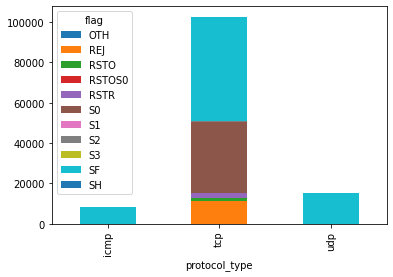

In [ ]:
pd.crosstab(Train_df.protocol_type, Train_df.flag).plot.bar(stacked=True)


In [ ]:
flag_protocol= pd.crosstab(Train_df.protocol_type,Train_df.flag,margins=True, margins_name = 'Total').style.background_gradient(cmap='summer_r')
flag_protocol

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,Total
protocol_type,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,8291,0,8291
tcp,46,11233,1562,103,2421,34851,365,127,49,51660,271,102688
udp,0,0,0,0,0,0,0,0,0,14993,0,14993
Total,46,11233,1562,103,2421,34851,365,127,49,74944,271,125972


In [ ]:
#use a crosstab to get flag vs protocol
#Flag_vs_protocol = pd.crosstab(Train_df.protocol_type, Train_df.flag,margins=True, margins_name = 'Total')
#Flag_vs_protocol

**-** **59%** of the connections are established normally (SF flag)

**-**All the connection statuses observed are associated with TCP protocol

**-**Only SF flag can be associated to ICMP, TCP and UDP

In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["flag"], Train_df["protocol_type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 20.0) =,19448.3874
1,p-value =,0.0000
2,Cramer's V =,0.2778


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.28 we can conclude that there's a low association between flag and protocol_type ######

##### Attack vs flag #####

In [ ]:
#use a crosstab to get attack vs flag
attack_vs_flag = pd.crosstab(Train_df.attack, Train_df.flag,margins=True)
attack_vs_flag

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,All
attack,,,,,,,,,,,,
back,0,0,0,0,90,0,2,5,0,859,0,956
buffer_overflow,0,0,1,0,0,0,0,0,0,29,0,30
ftp_write,0,0,0,0,0,0,0,0,0,8,0,8
guess_passwd,0,0,45,0,4,0,0,0,2,2,0,53
imap,0,0,0,0,0,0,1,0,0,6,4,11
ipsweep,0,396,30,0,0,0,0,0,0,3173,0,3599
land,0,0,0,0,0,18,0,0,0,0,0,18
loadmodule,0,0,0,0,0,0,0,0,0,9,0,9
multihop,0,0,0,0,0,0,0,0,0,7,0,7


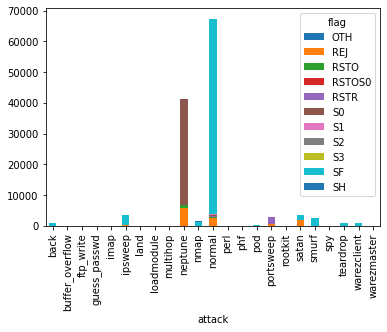

In [ ]:
pd.crosstab(Train_df.attack, Train_df.flag).plot.bar(stacked=True)


**-** The table above shows that in both normal connections and attacks we can notice SF flags.

**-** Neptune attacks have an interesting number of S0 flags(98.5%)


In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["flag"], Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 220.0) =,238050.8762
1,p-value =,0.0000
2,Cramer's V =,0.4347


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.43 we can conclude that there's a moderate association between flag and attack ######

##### Attack vs Service #####

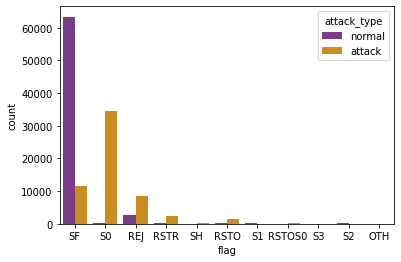

In [ ]:
sns.countplot(x='flag',hue='attack_type' , data = Train_df , palette ='CMRmap')

In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["service"], Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 1518.0) =,350656.1804
1,p-value =,0.0000
2,Cramer's V =,0.3557


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.36 we can conclude that there's a moderate association between service and attack ######

##### Protocol_type vs Service #####

In [ ]:
SP= pd.crosstab(Train_df.service,Train_df.protocol_type,margins=True).T.style.background_gradient(cmap='summer_r')
SP

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4586,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,538,569,0,434,0,0,485,474,1767,1754,6859,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,0,1871,5,78,264,69,18562,0,78,86,65,7313,245,311,381,544,477,2353,0,0,654,0,0,780,689,617,693,102688
udp,0,0,0,0,0,0,0,0,0,0,0,0,9043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2488,0,0,0,0,3291,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,538,569,9043,434,4586,3077,485,474,1767,1754,6859,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,168,4359,5,78,264,69,21853,8,78,86,65,7313,245,311,381,544,477,2353,3,8,654,10,602,780,689,617,693,125972


In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["service"], Train_df["protocol_type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 138.0) =,214745.0478
1,p-value =,0.0000
2,Cramer's V =,0.9232


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.92 we can conclude that there's a strong association between service and protocol_type ######

##### Flag vs Service #####

In [ ]:
crosstab, test_results, expected = rp.crosstab(Train_df["service"], Train_df["flag"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 690.0) =,112468.4941
1,p-value =,0.0000
2,Cramer's V =,0.2988


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.3 we can conclude that there's a low association between service and protocol_type ######

##Analyzing binary variables##

**A binary variable is a categorical variable that can only take one of two values, usually represented as a Boolean — True or False — or an integer variable**

in our case, all the binary features are represented as 0/1
According to the metadata, we have 5 binary features which are :

land
logged_in
root_shell
is_host_login
is_guest_login

In [ ]:
#Extraction of binary data
col_bin=['land','logged_in','root_shell','is_host_login','is_guest_login','su_attempted']
df_bin=Train_df[col_bin]
df_bin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125972.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125972.0,0.395739,0.489011,0.0,0.0,0.0,1.0,1.0
root_shell,125972.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
is_host_login,125972.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125972.0,0.009423,0.096613,0.0,0.0,0.0,0.0,1.0
su_attempted,125972.0,0.001103,0.045155,0.0,0.0,0.0,0.0,2.0


In [ ]:
#check the variable su_attempted
attempted_vs_attack = pd.crosstab(Train_df.attack_check, Train_df.su_attempted,margins=True)
attempted_vs_attack.T


attack_check,0,1,All
su_attempted,,,
0,67263,58629,125892
1,20,1,21
2,59,0,59
All,67342,58630,125972


the su_attempted feature should be binary. It takes 1 if "su root'' command attempted or used; 0 otherwise.

From the crosstab we can see that it has 3 values

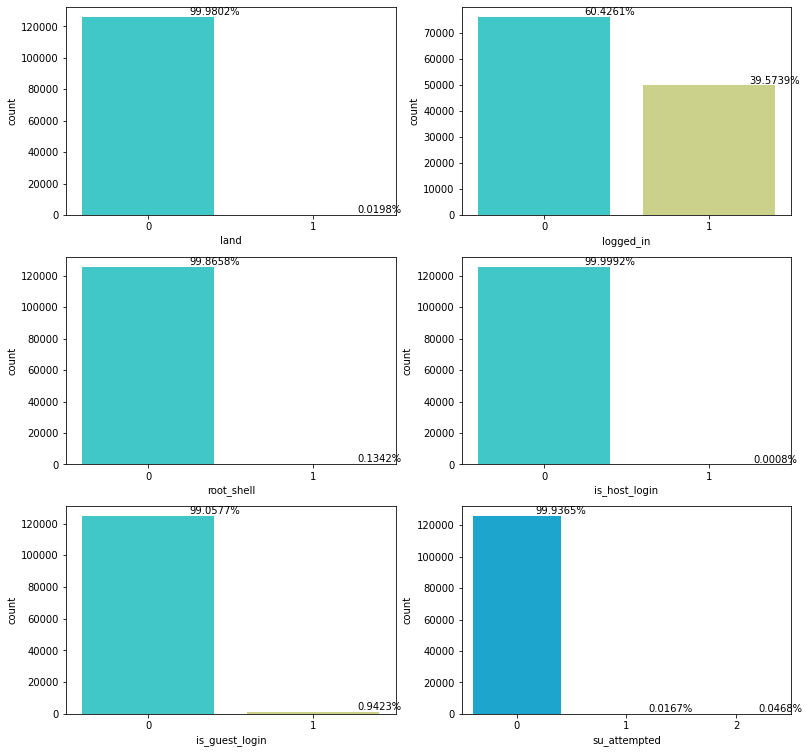

In [ ]:
#visualization of binary data
plt.figure(figsize = (13, 13))
total = float(len(df_bin))
for i in enumerate(col_bin):
  plt.subplot(3, 2,i[0]+1)
  ax=sns.countplot(x=i[1], data = df_bin,palette='rainbow')
  for p in ax.patches:
    percentage = '{:.4f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='bottom')


**land:**  
1.9% of connections have a land =1 which means in a connection, source and destination IP addresses and port numbers are equal.
**logged_in:**
There were 60.4% of connections that failed to log into the system.  
Logging in was only possible for 39.6% of connections considered a significant percentage.  
Thus, it might be a sign of an attck.
We will explore the relationship between attack and logged_in variables in the next steps.

**root_shell:**
Around 13.4% of connections gained access to the root shells of remote systems.
Remeber that root shell is a shell with administrator privileges.

**is_host_login:**
0.008% of connections have logged in as users of the hot list ( root or admin).

**is_guest_login:**
9.4% of connections have logged in to remote systems as guests. Guest access enable the use of your
computer or server with a lot of restrictions such as not being able to change settings, access private files,...

**Su_attempted**
From the bar chart we can confirm that it has 3 values
the class 0 is the majority class with a percentage of 99.94% compared to the 2 other classes
In the preprocessing section we will replace the "2" class with "0" class

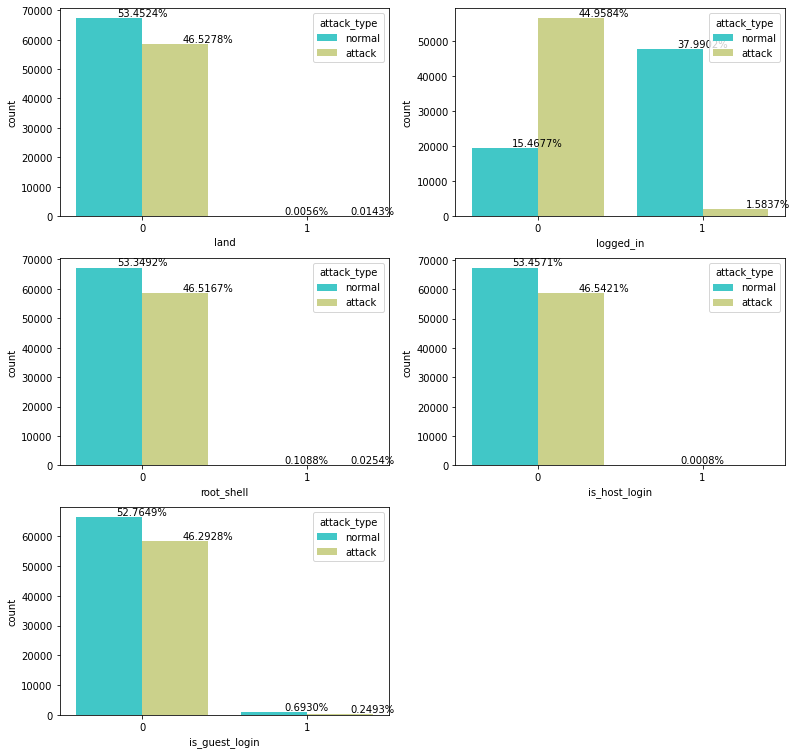

In [ ]:
col_bin=['land','logged_in','root_shell','is_host_login','is_guest_login']
df_bin=Train_df[col_bin]
plt.figure(figsize = (13, 13))
total = float(len(df_bin))
for i in enumerate(col_bin):
    plt.subplot(3, 2,i[0]+1)
    ax=sns.countplot(x=i[1], data = df_bin,hue=Train_df.attack_type,palette='rainbow')
    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center', va='bottom')

**land vs attack :**
In real life,  a connection that has  same port numbers and same IP adresses for both source and destination is a rare case. We can confirm that through the bar chart showing land vs attacks.
We notice that normal connections as well as attacks have a high percentage of land=0 ( 53.54% and 46.53% respectively ) .  
When land =1, we can perceive that attacks are more frequent than normal connections with a percentage of 0.014% comparing 0.006%.  
After examing our dataset, we noticed that the type of attacks having land=1 are 'Land' attacks.

**logged_in vs attack:**
Most of the connections that failed to access to the systems are attacks with a high percentage equal to 44.96% compared to normal connections 15.47% .  
We notice also only 1.58% of attacks gained access to the systems compared to 38% for normal connections.  
This case might be explained by numerous factors such as for example having a strong security measures

**root_shell vs attack:**
When root_shell=0, we notice that normal connections are more frequent than attacks with a percentage
of 53.35% compared to 46.52% .
With root_shell=1, only 0.03% of attacks have gained access to the root shell which is a very low percentage.

**is_host_login:**
There is no attack that gained access as root or admin.

**is_guest_login:**
Attackers might be less intrested to gain access to targeted systems as a guest since this mode has a lot of restrictions. This explains the low percentage (0.008%) for guest_login=1 .

In [ ]:
#Relationship between land and attack
crosstab, test_results, expected = rp.crosstab(Train_df["land"],Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 22.0) =,90696.5058
1,p-value =,0.0000
2,Cramer's V =,0.8485


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.85 we can conclude that there's a strong association between attack and land ######

In [ ]:
#Relationship between logged_in and attck
crosstab, test_results, expected = rp.crosstab(Train_df["logged_in"],Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 22.0) =,67673.4127
1,p-value =,0.0000
2,Cramer's V =,0.7329


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.73 we can conclude that there's a strong association between attack and logged_in ######

In [ ]:
#Relationship between root_shell and attck
crosstab, test_results, expected = rp.crosstab(Train_df["root_shell"],Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 22.0) =,14796.1534
1,p-value =,0.0000
2,Cramer's V =,0.3427


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.34 we can conclude that there's a moderate association between attack and root_shell ######

In [ ]:
#Relationship between is_host_login and attck
crosstab, test_results, expected = rp.crosstab(Train_df["is_host_login"],Train_df["attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 22.0) =,0.8706
1,p-value =,1.0000
2,Cramer's V =,0.0026


###### Since p-value==0.000<0.005 we can assume that there is a relation between the two variables and with a value of cramer's V equal to 0.73 we can conclude that there's no association between attack and is_host_login ######

##Analyzing Numerical variables##

### First visualizations ###

**Now we will visualize our integer type features with large ranges in histograms.**

In [ ]:
#To make it easier for us, we write up a simple plot/subplot function:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5)
    fig = plt.figure(figsize=(15,25))

    for n, col in enumerate(df[cols]):
        ax = plt.subplot(grid[n])

        ax.hist(df[col], bins=20)
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15)

    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

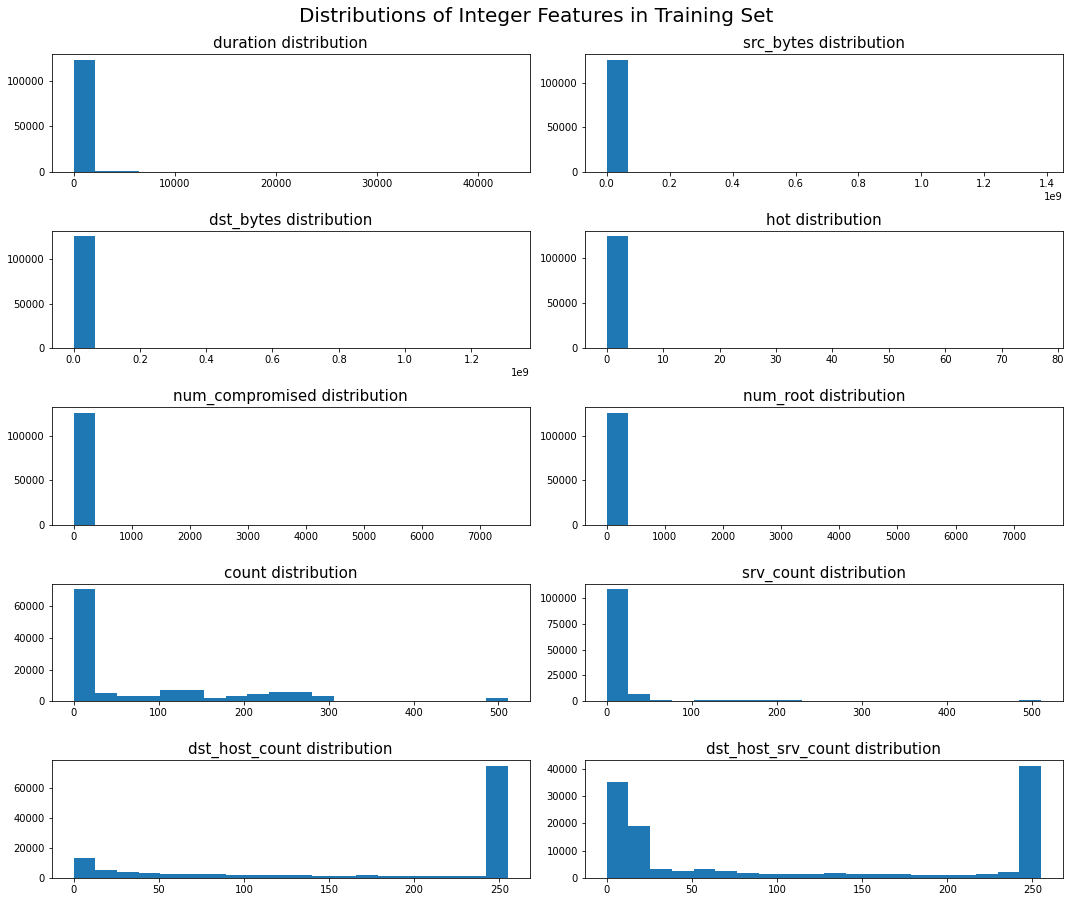

In [ ]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

plot_hist(Train_df, hist_cols, 'Distributions of Integer Features in Training Set')

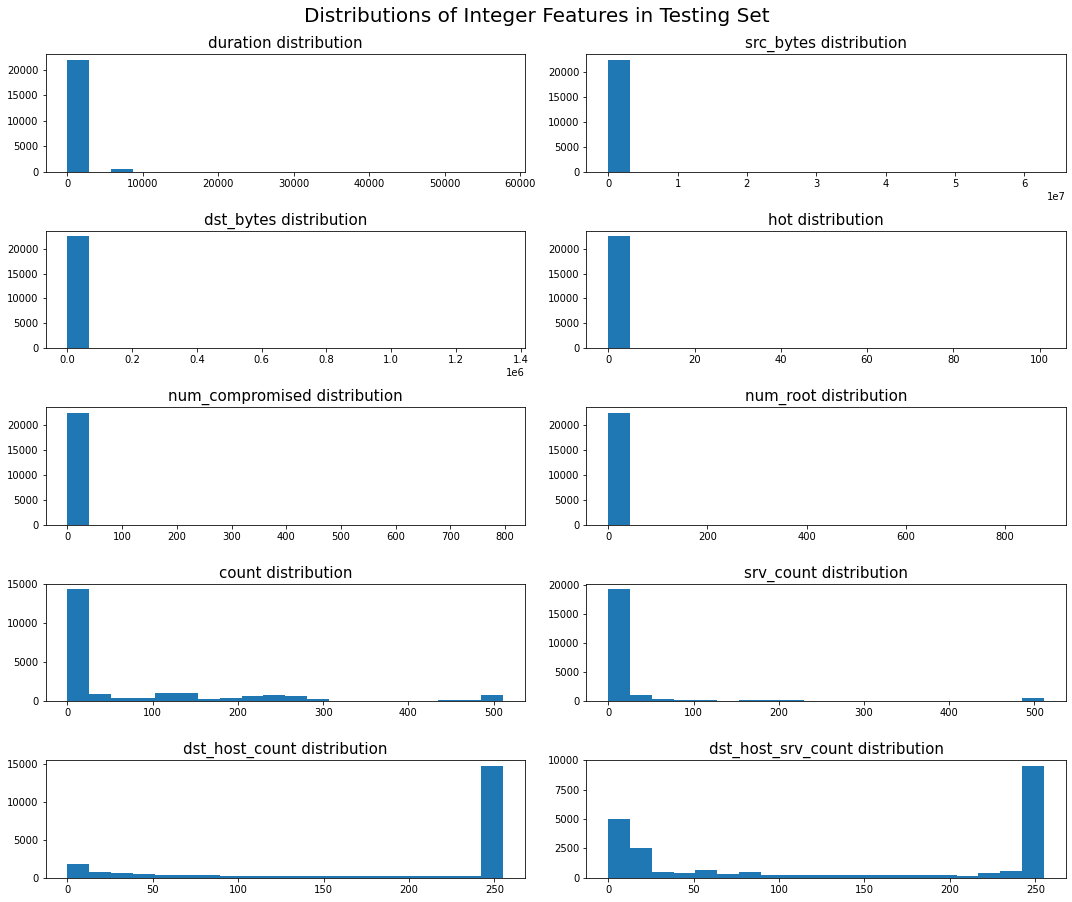

In [ ]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

plot_hist(Test_df, hist_cols, 'Distributions of Integer Features in Testing Set')

Although these initial plots are a bit hard to read for certain ranges (due to the skewed overall distribution), we clearly see how these features have bimodal (even multimodal) distributions wtih a large range. It's clear that to make these features more manageable, we will need to normalize them.

**We repeat the same type of visualizations for our rate columns**



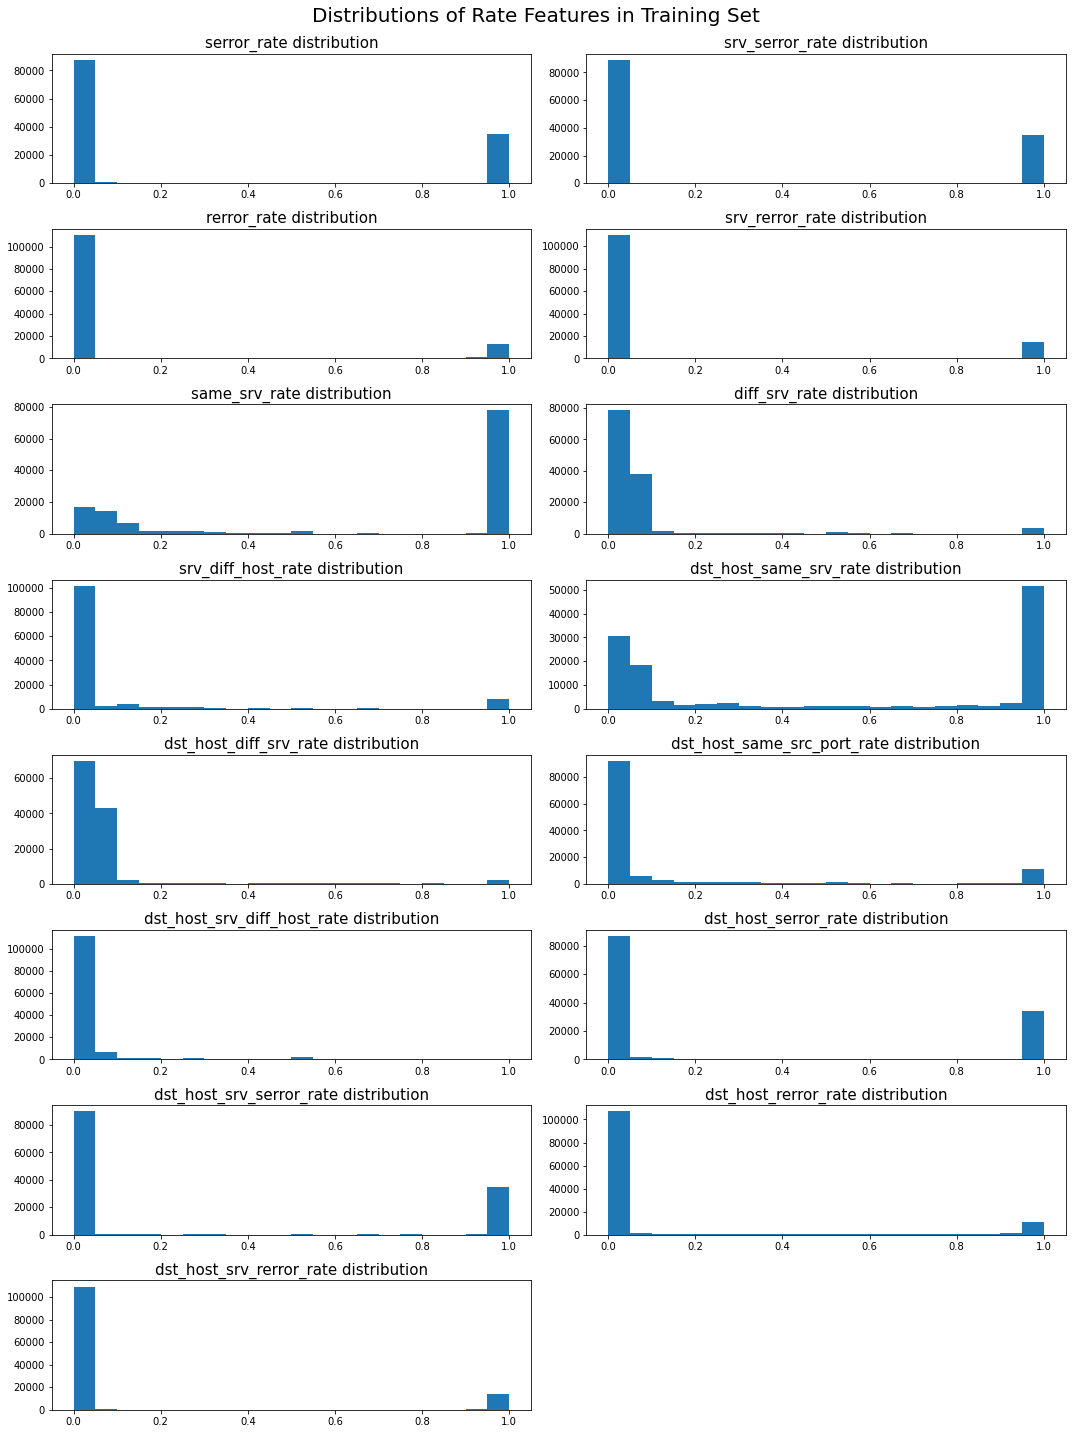

In [ ]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

plot_hist(Train_df, rate_cols, 'Distributions of Rate Features in Training Set')

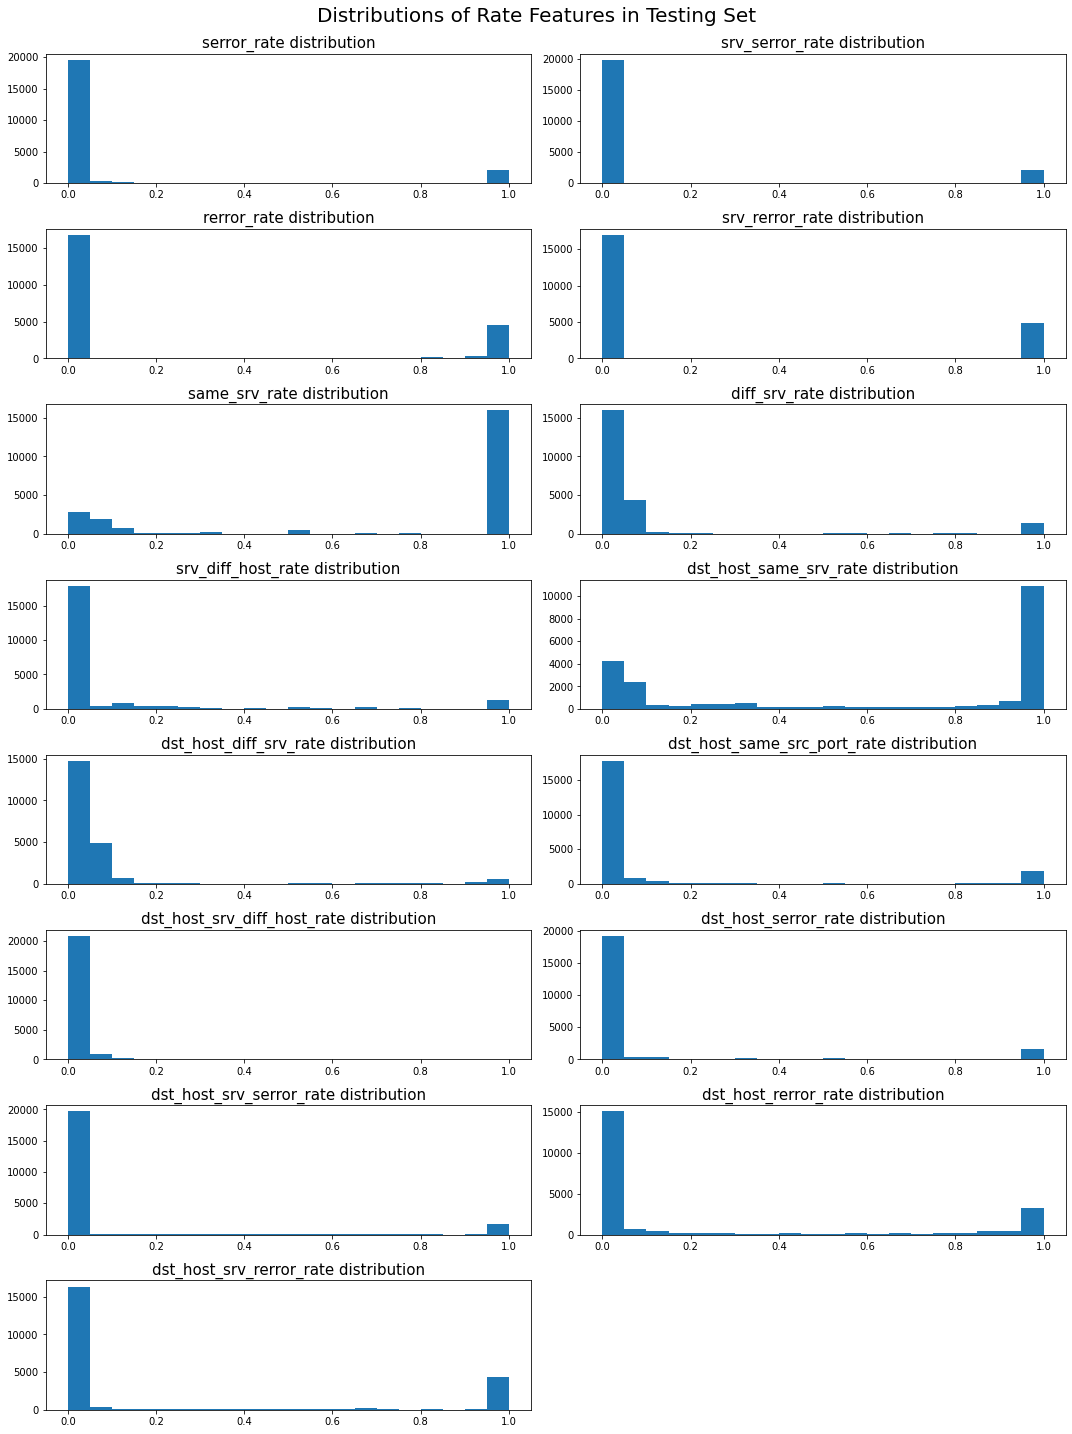

In [ ]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

plot_hist(Test_df, rate_cols, 'Distributions of Rate Features in Testing Set')

Again, in all these features, we see the same bimodal distributions we saw in the integer type features. Although, in this case, we did verify that the ranges of our rate features are from 0 to 1.

### Outlier detection ###

In [ ]:
#Train_df.shape[1]

In [ ]:
#Train_df.loc[:, Train_df.dtypes == 'O']

In [ ]:
bin=['land','logged_in','root_shell','is_host_login','is_guest_login','su_attempted','attack_check']
no_bin = Train_df[Train_df.columns.difference(bin)]

In [ ]:
numerical = [var for var in no_bin.columns if no_bin[var].dtype!='O']

In [ ]:
no_bin['urgent'].value_counts()

0    125963
1         5
2         3
3         1
Name: urgent, dtype: int64

In [ ]:
no_bin['dst_bytes'].max()

1309937401

In [ ]:
no_bin['src_bytes'].max()

1379963888

In [ ]:
no_bin[numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
count,125972.0,84.11,114.51,0.0,2.00,14.00,143.00,5.110000e+02
diff_srv_rate,125972.0,0.06,0.18,0.0,0.00,0.00,0.06,1.000000e+00
dst_bytes,125972.0,19779.27,4021285.11,0.0,0.00,0.00,516.00,1.309937e+09
dst_host_count,125972.0,182.15,99.21,0.0,82.00,255.00,255.00,2.550000e+02
dst_host_diff_srv_rate,125972.0,0.08,0.19,0.0,0.00,0.02,0.07,1.000000e+00
dst_host_rerror_rate,125972.0,0.12,0.31,0.0,0.00,0.00,0.00,1.000000e+00
dst_host_same_src_port_rate,125972.0,0.15,0.31,0.0,0.00,0.00,0.06,1.000000e+00
dst_host_same_srv_rate,125972.0,0.52,0.45,0.0,0.05,0.51,1.00,1.000000e+00
dst_host_serror_rate,125972.0,0.28,0.44,0.0,0.00,0.00,1.00,1.000000e+00
dst_host_srv_count,125972.0,115.65,110.70,0.0,10.00,63.00,255.00,2.550000e+02


Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers.

This function shows us a summary statistics for all numerical variables. A first observation is that max of source bytes is greater than max destination bytes. This loss of data could be caused by **faulty hardware, software issues or even network attacks.**
**-** all min values are equal to zero

**-**The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.
This will lead us to the Data scaling.

**-** num_outband_cmds has an abnormal distribution (min, max,std.. are all equal to 0)=> this feature will be dropped in the preprocessing step since it doesn't affect the model predictions

**-** On closer inspection, we can see that the src_bytes,dst_bytes and srv_count columns may contain outliers.

we will draw boxplots to visualise outliers in the above variables.

Let's deep dive into our features to discover more insights

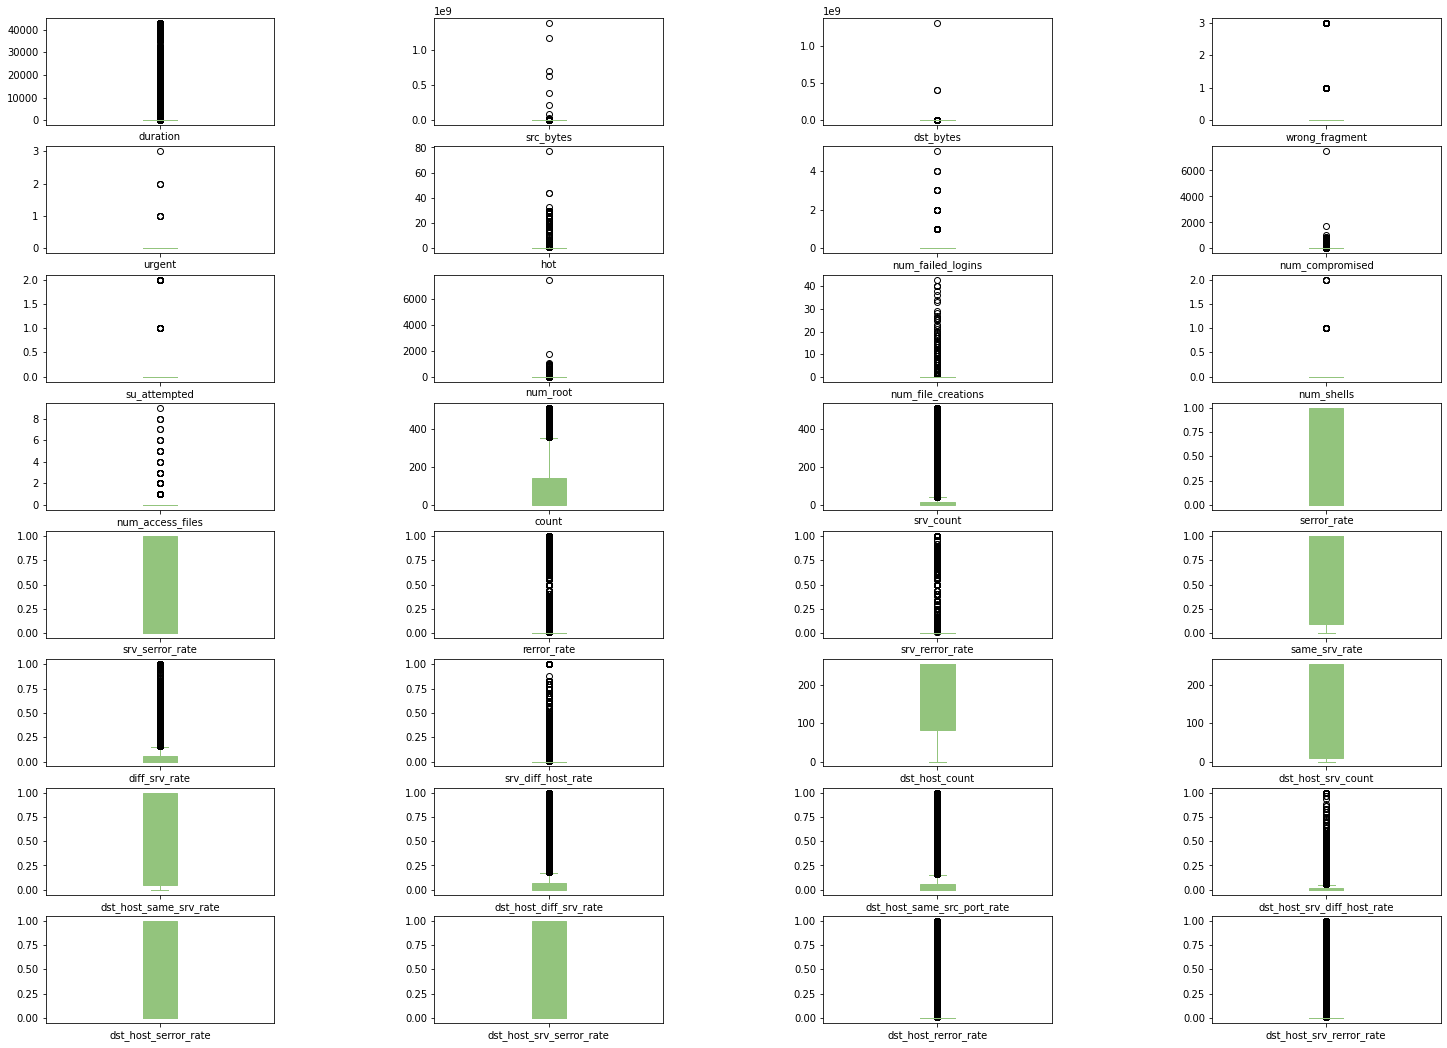

In [ ]:
nums = Train_df.select_dtypes(exclude=["object"])
numsNoBin=nums.loc[:,~nums.columns.isin(['land', 'logged_in','root_shell','is_host_login','is_guest_login','attack_check','level','num_outbound_cmds'])]
numsNoBin.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#93c47d")
plt.subplots_adjust(wspace = 0.7)
plt.style.use("ggplot")
plt.show()

In [ ]:
numsNoOutliers=nums.loc[:,~nums.columns.isin(['land', 'logged_in','root_shell','is_host_login','is_guest_login','attack_flag','level','num_outbound_cmds','serror_rate','same_srv_rate','srv_serror_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])]

In [ ]:
for feature in numsNoOutliers:
    IQR = Train_df[feature].quantile(0.75) - Train_df[feature].quantile(0.25)
    Lower_fence = Train_df[feature].quantile(0.25) - (IQR * 1.5)
    Upper_fence = Train_df[feature].quantile(0.75) + (IQR * 1.5)
    print('{feature}  outliers are values < {lowerboundary} or > {upperboundary}'.format(feature=feature,lowerboundary=Lower_fence, upperboundary=Upper_fence))

duration  outliers are values < 0.0 or > 0.0
src_bytes  outliers are values < -414.0 or > 690.0
dst_bytes  outliers are values < -774.0 or > 1290.0
wrong_fragment  outliers are values < 0.0 or > 0.0
urgent  outliers are values < 0.0 or > 0.0
hot  outliers are values < 0.0 or > 0.0
num_failed_logins  outliers are values < 0.0 or > 0.0
num_compromised  outliers are values < 0.0 or > 0.0
su_attempted  outliers are values < 0.0 or > 0.0
num_root  outliers are values < 0.0 or > 0.0
num_file_creations  outliers are values < 0.0 or > 0.0
num_shells  outliers are values < 0.0 or > 0.0
num_access_files  outliers are values < 0.0 or > 0.0
count  outliers are values < -209.5 or > 354.5
srv_count  outliers are values < -22.0 or > 42.0
rerror_rate  outliers are values < 0.0 or > 0.0
srv_rerror_rate  outliers are values < 0.0 or > 0.0
diff_srv_rate  outliers are values < -0.09 or > 0.15
srv_diff_host_rate  outliers are values < 0.0 or > 0.0
dst_host_diff_srv_rate  outliers are values < -0.1050000000

We can notice that 15 variables have lower whisker and upper whisker equal to 0.
these values may affect prediction.

In the next step we will treat them.

sice all the variables distributions are skewed, we will use interquantile range to find outliers.

#**3.Data preparation**#

## Removing unncessary columns ##

In [ ]:
Train_copy=Train_df
Test_copy=Test_df
Test_copy


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_check,attack_type,Class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,1.00,1.00,neptune,21,1,attack,Dos
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.02,0.00,0.0,0.00,0.00,normal,21,0,normal,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.28,0.00,0.0,0.00,0.00,saint,15,1,attack,Probe
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.02,0.00,0.0,0.83,0.71,mscan,11,1,attack,Probe
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.03,0.01,0.0,0.00,0.00,normal,21,0,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.01,0.01,0.0,0.00,0.00,normal,21,0,normal,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.01,0.01,0.0,0.00,0.00,normal,21,0,normal,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.0,0.07,0.07,back,15,1,attack,Dos
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,normal,21,0,normal,normal


In [ ]:
#'num_outbound_cmds' is a redundant column, we have to remove it from both train & test datasets
Train_copy.drop(['num_outbound_cmds'], axis=1, inplace=True)
Test_copy.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# remove attribute 'level' which indicated the difficulty level of an attack
Train_copy.drop(['level'],axis=1,inplace=True)
Test_copy.drop(['level'], axis=1, inplace=True)

In [ ]:
Train_copy['su_attempted'].unique()

array([0, 1, 2])

In [ ]:
# 'su_attempted' should be a binary feature, but has 3 values
# '2.0' value is replaced to '0.0' for both train and test datasets
Train_copy['su_attempted'] = Train_copy['su_attempted'].replace(2.0, 0.0)
Test_copy['su_attempted'] = Test_copy['su_attempted'].replace(2.0, 0.0)

In [ ]:
Train_copy['su_attempted'].unique()

array([0, 1])

In [ ]:
#drop class/attack_type
Train_copy.drop(['Class'],axis=1,inplace=True)
Train_copy.drop(['attack_type'],axis=1,inplace=True)
Test_copy.drop(['Class'],axis=1,inplace=True)
Test_copy.drop(['attack_type'],axis=1,inplace=True)
Train_copy.drop(['attack'],axis=1,inplace=True)
Test_copy.drop(['attack'],axis=1,inplace=True)







##Splitting data##

In [ ]:
x_train=Train_copy.drop('attack_check',axis=1)
y_train=Train_copy['attack_check']
x_test=Test_copy.drop('attack_check',axis=1)
y_test=Test_copy['attack_check']




In [ ]:
print(x_train.shape,x_test.shape)

(125972, 40) (22543, 40)


##Handling outliers in numerical variables

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['src_bytes'] = max_value(df3, 'src_bytes', 690.0)
    df3['dst_bytes'] = max_value(df3, 'dst_bytes', 1290.0)
    df3['srv_count'] = max_value(df3, 'srv_count', 42.0)
    df3['diff_srv_rate'] = max_value(df3, 'diff_srv_rate', 0.15)
    df3['count'] = max_value(df3, 'count', 354.5)
    df3['dst_host_diff_srv_rate'] = max_value(df3, 'dst_host_diff_srv_rate', 0.175)
    df3['dst_host_same_src_port_rate'] = max_value(df3, 'dst_host_same_src_port_rate', 0.15)
    df3['dst_host_srv_diff_host_rate'] = max_value(df3, 'dst_host_srv_diff_host_rate', 0.05)
    df3['duration'] = max_value(df3, 'duration', 0.0)
    df3['wrong_fragment'] = max_value(df3, 'wrong_fragment', 0.0)
    df3['urgent'] = max_value(df3, 'urgent', 0.0)
    df3['hot'] = max_value(df3, 'hot', 0.0)
    df3['num_failed_logins'] = max_value(df3, 'num_failed_logins', 0.0)
    df3['num_compromised'] = max_value(df3, 'num_compromised', 0.0)
    df3['num_root'] = max_value(df3, 'num_root', 0.0)
    df3['num_file_creations'] = max_value(df3, 'num_file_creations', 0.0)
    df3['num_shells'] = max_value(df3, 'num_shells', 0.0)
    df3['num_access_files'] = max_value(df3, 'num_access_files', 0.0)
    df3['rerror_rate'] = max_value(df3, 'rerror_rate', 0.0)
    df3['srv_rerror_rate'] = max_value(df3, 'srv_rerror_rate', 0.0)
    df3['srv_diff_host_rate'] = max_value(df3, 'srv_diff_host_rate', 0.0)
    df3['dst_host_rerror_rate'] = max_value(df3, 'dst_host_rerror_rate', 0.0)
    df3['dst_host_srv_rerror_rate'] = max_value(df3, 'dst_host_srv_rerror_rate', 0.0)
    df3['su_attempted'] = max_value(df3, 'su_attempted', 0.0)



In [ ]:
x_train['count'].value_counts()

1.0      27763
2.0       9473
3.0       3962
4.0       3550
354.5     3157
         ...  
339.0        7
354.0        6
352.0        6
334.0        6
350.0        6
Name: count, Length: 356, dtype: int64

##Scaling

In [ ]:
std_scaler = preprocessing.StandardScaler()
def standardization(df, col):
    for i in col:
        arr = np.array(df[i])
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [ ]:
numeric_col = x_train.select_dtypes(include='number').columns
x_train = standardization(x_train, numeric_col)
x_test = standardization(x_test, numeric_col)


In [ ]:
print(x_train)

        src_bytes  dst_bytes      land  logged_in  root_shell  is_host_login  \
0       -0.110856  -0.675326 -0.014089  -0.809267   -0.036652      -0.002818   
1       -0.762436  -0.675326 -0.014089  -0.809267   -0.036652      -0.002818   
2        0.272951   1.859844 -0.014089   1.235686   -0.036652      -0.002818   
3        0.125676   0.150078 -0.014089   1.235686   -0.036652      -0.002818   
4       -0.762436  -0.675326 -0.014089  -0.809267   -0.036652      -0.002818   
...           ...        ...       ...        ...         ...            ...   
125967  -0.762436  -0.675326 -0.014089  -0.809267   -0.036652      -0.002818   
125968  -0.293834  -0.390365 -0.014089  -0.809267   -0.036652      -0.002818   
125969   2.316947   0.079330 -0.014089   1.235686   -0.036652      -0.002818   
125970  -0.762436  -0.675326 -0.014089  -0.809267   -0.036652      -0.002818   
125971  -0.088542  -0.675326 -0.014089   1.235686   -0.036652      -0.002818   

        is_guest_login     count  srv_c

In [ ]:
# Save the scaler object
with open('scaler.pkl', 'wb') as f:
    pickle.dump(std_scaler, f)

# Save the standardization function
with open('standardization.pkl', 'wb') as f:
    pickle.dump(standardization, f)

##Encoding Categorical variables using one-hot encoding

In [ ]:
x_train.select_dtypes('object').columns


Index(['protocol_type', 'service', 'flag'], dtype='object')

In [ ]:
cat_col = ['protocol_type', 'service', 'flag']
# encoding train set
categorical_train = x_train[cat_col]
categorical_train = pd.get_dummies(categorical_train,columns=cat_col)
categorical_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
x_train.drop(cat_col, axis=1, inplace=True)
x_train = pd.concat([x_train, categorical_train],axis=1)
x_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,-0.110856,-0.675326,-0.014089,0.0,0.0,0.0,0.0,-0.809267,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,-0.762436,-0.675326,-0.014089,0.0,0.0,0.0,0.0,-0.809267,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.272951,1.859844,-0.014089,0.0,0.0,0.0,0.0,1.235686,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.125676,0.150078,-0.014089,0.0,0.0,0.0,0.0,1.235686,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,-0.762436,-0.675326,-0.014089,0.0,0.0,0.0,0.0,-0.809267,0.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# encoding test set
categorical_test = x_test[cat_col]
categorical_test = pd.get_dummies(categorical_test,columns=cat_col)
categorical_test.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
fill_list = np.setdiff1d(categorical_train.columns, categorical_test.columns)
for item in fill_list:
    categorical_test[item]=0
categorical_test = categorical_test[categorical_train.columns]

In [ ]:
x_test.drop(cat_col, axis=1, inplace=True)
x_test = pd.concat([x_test, categorical_test],axis=1)
x_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,-0.805327,-0.722049,-0.017624,0.0,0.0,0.0,0.0,-0.890408,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,2.250955,-0.722049,-0.017624,0.0,0.0,0.0,0.0,-0.890408,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,-0.716740,-0.722049,-0.017624,0.0,0.0,0.0,0.0,-0.890408,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,-0.805327,-0.692549,-0.017624,0.0,0.0,0.0,0.0,-0.890408,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.377321,1.815014,-0.017624,0.0,0.0,0.0,0.0,1.123081,0.0,...,0,0,0,0,0,0,0,0,1,0


##Removing constant features

In [ ]:
# Remove Constant Features
# Find all constant Features
# For each feature in training data, if it's standard deviation == 0, it is a constant variable.
const_features = [feat for feat in x_train.columns if x_train[feat].std() == 0]

In [ ]:
len(const_features)

16

In [ ]:
const_features

['duration',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'rerror_rate',
 'srv_rerror_rate',
 'srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
# Remove constant features
x_train.drop(labels=const_features, axis=1, inplace=True)
x_test.drop(labels=const_features, axis=1, inplace=True)

In [ ]:
x_train.head()

,src_bytes,dst_bytes,land,logged_in,root_shell,is_host_login,is_guest_login,count,srv_count,serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110856,-0.675326,-0.014089,-0.809267,-0.036652,-0.002818,-0.097531,-0.650135,-0.875865,-0.637213,...,0,0,0,0,0,0,0,0,1,0
1,-0.762436,-0.675326,-0.014089,-0.809267,-0.036652,-0.002818,-0.097531,0.402996,-0.482619,1.602655,...,0,0,0,0,1,0,0,0,0,0
2,0.272951,1.859844,-0.014089,1.235686,-0.036652,-0.002818,-0.097531,-0.726727,-0.561268,-0.189239,...,0,0,0,0,0,0,0,0,1,0
3,0.125676,0.150078,-0.014089,1.235686,-0.036652,-0.002818,-0.097531,-0.487379,1.562262,-0.637213,...,0,0,0,0,0,0,0,0,1,0
4,-0.762436,-0.675326,-0.014089,-0.809267,-0.036652,-0.002818,-0.097531,0.383848,0.539822,-0.637213,...,1,0,0,0,0,0,0,0,0,0


###Removing quasi-constant features###

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Feature Selector
# 0.01: Approx. 99% of observations
feature_selector = VarianceThreshold(threshold=0.01)
feature_selector.fit(x_train)


VarianceThreshold(threshold=0.01)

In [ ]:
# Num. features to be retained
sum(feature_selector.get_support())

40

In [ ]:
# Features that are Quasi -constant
quasi=[x for x in x_train.columns if x not in x_train.columns[feature_selector.get_support()]]

In [ ]:
len(quasi)

65

In [ ]:
# Remove quasi constant features
x_train.drop(labels=quasi, axis=1, inplace=True)
x_test.drop(labels=quasi, axis=1, inplace=True)

In [ ]:
#x_train = feature_selector.transform(x_train)
#x_test = feature_selector.transform(x_test)

In [ ]:
x_train.shape

(125972, 40)

In [ ]:
x_test.shape

(22543, 40)

In [ ]:
y_test.value_counts()

1    12832
0     9711
Name: attack_check, dtype: int64

In [ ]:
x_train.columns

Index(['src_bytes', 'dst_bytes', 'land', 'logged_in', 'root_shell',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'protocol_type_icmp', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_eco_i',
       'service_ecr_i', 'service_finger', 'service_ftp', 'service_ftp_data',
       'service_http', 'service_other', 'service_private', 'service_smtp',
       'service_telnet', 'flag_REJ', 'flag_RSTO', 'flag_RSTR', 'flag_S0',
       'flag_SF'],
      dtype='object')

##Feature selection##



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
rfecv = RFECV(estimator= model, step = 1, cv = 5, scoring="accuracy")
rfecv = rfecv.fit(x_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", x_train.columns[rfecv.support_])

The optimal number of features: 38
Best features: Index(['src_bytes', 'dst_bytes', 'logged_in', 'root_shell', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_finger',
       'service_ftp', 'service_ftp_data', 'service_http', 'service_other',
       'service_private', 'service_smtp', 'service_telnet', 'flag_REJ',
       'flag_RSTO', 'flag_RSTR', 'flag_S0', 'flag_SF'],
      dtype='object')


#**4.Modeling + Evaluation**#

In [ ]:
from sklearn import metrics
kernal_evals = dict()
def evaluate_classification(model, name, x_train, x_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(x_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(x_test))

    train_precision = metrics.precision_score(y_train, model.predict(x_train))
    test_precision = metrics.precision_score(y_test, model.predict(x_test))

    train_recall = metrics.recall_score(y_train, model.predict(x_train))
    test_recall = metrics.recall_score(y_test, model.predict(x_test))


    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    print('Confusion matrix\n\n')
    print('\nTrue Positives(TP) = ', confusion_matrix[1,1])
    print('\nTrue Negatives(TN) = ', confusion_matrix[0,0])
    print('\nFalse Positives(FP) = ', confusion_matrix[0,1])
    print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 96.62226526529705  Test Accuracy Logistic Regression 76.5559153617531
Training Precesion Logistic Regression 97.5197944523098  Test Precesion Logistic Regression 90.6058323469278
Training Recall Logistic Regression 95.1628858945932  Test Recall Logistic Regression 65.61720698254364
Confusion matrix



True Positives(TP) =  8420

True Negatives(TN) =  8838

False Positives(FP) =  873

False Negatives(FN) =  4412


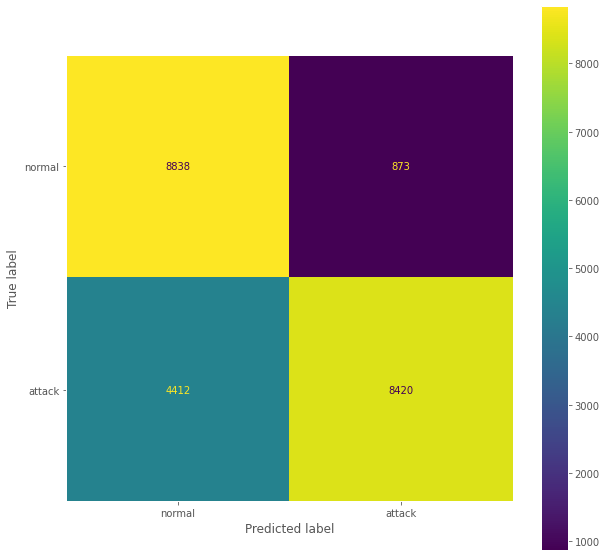

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

The confusion matrix shows 8420 + 8838 = 17258 correct predictions and 873 +4412  = 5285 incorrect predictions.


Higher precision means that an algorithm returns more relevant results than irrelevant ones,the logistic regression model returns a value of **90.6%**

we have a high recall(**65.62%**) which means that the total relevant results are correctly classified by the logistic regression

In [ ]:
from sklearn import svm
lin_svc = svm.LinearSVC().fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC 96.94932207157146  Test Accuracy Linear SVC 76.26757751852016
Training Precesion Linear SVC 97.79964752482158  Test Precesion Linear SVC 90.5045474231269
Training Recall Linear SVC 95.5961112058673  Test Recall Linear SVC 65.14183291770573
Confusion matrix



True Positives(TP) =  8359

True Negatives(TN) =  8834

False Positives(FP) =  877

False Negatives(FN) =  4473


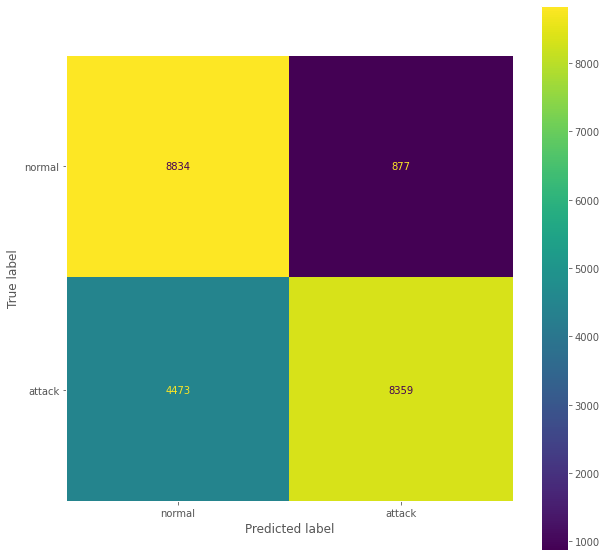

In [ ]:
evaluate_classification(lin_svc, "Linear SVC", x_train, x_test, y_train, y_test)

The confusion matrix shows 8367 + 8835 = 17202 correct predictions and 876 +4465  = 5341 incorrect predictions.

Higher precision means that an algorithm returns more relevant results than irrelevant ones,the decision tree model returns a value of **90.52%**

we have a high recall(**65.20%**) which means that the total relevant results are correctly classified by the decision tree

Training Accuracy DecisionTreeClassifier 99.98174197440702  Test Accuracy DecisionTreeClassifier 86.02670452025019
Training Precesion DecisionTreeClassifier 99.99658767125625  Test Precesion DecisionTreeClassifier 94.92390497401634
Training Recall DecisionTreeClassifier 99.96418215930412  Test Recall DecisionTreeClassifier 79.71477556109726
Confusion matrix



True Positives(TP) =  10229

True Negatives(TN) =  9164

False Positives(FP) =  547

False Negatives(FN) =  2603


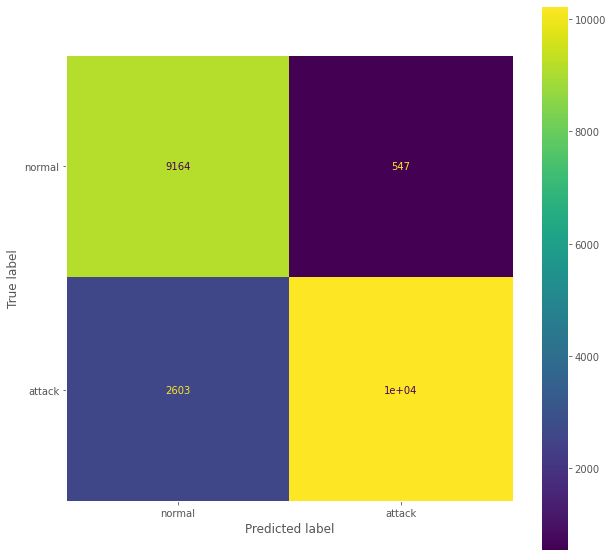

In [ ]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

The confusion matrix shows 9948 + 9234 = 19182 correct predictions and 477 +2884  = 3361 incorrect predictions.

Higher precision means that an algorithm returns more relevant results than irrelevant ones,svm  model returns a value of **95.42%**

we have a high recall(**77.52%**) which means that the total relevant results are correctly classified by svm model

In [ ]:
def acc_comparison():
  ml_models = {
    'Logistic regression': lr,
    'SVM': lin_svc,
    'Decision Tree Classifier': tdt}
  for model in ml_models:
    test_accuracy = metrics.accuracy_score(y_test, ml_models[model].predict(x_test))
    print(f"{model.upper():{30}} test_accuracy: {test_accuracy:.3f}")



In [ ]:
acc_comparison()

LOGISTIC REGRESSION            test_accuracy: 0.766
SVM                            test_accuracy: 0.763
DECISION TREE CLASSIFIER       test_accuracy: 0.860


We get maximum accuracy with DecisionTree model.the accuracy is equal to 85.09% compared to 76.3% and 76.56%  respectively for svm and logisitic regression.

So, we can conclude that the decision tree model is doing a very good job in terms of predicting the attack class.

In [ ]:
import pickle
# save the model to disk
filename = 'Decision_tree_model.sav'
pickle.dump(tdt, open(filename, 'wb'))


#**5.Deployment**#





We used the PyCharm IDE to implement an interface in which a user inputs the necessary information about a given connection in order to detect either it's an attack or a normal connection.

#**III.Conclusion**#

In this project, the significance of using a set of relevant
features with an adequate classification learning algorithm for
modelling an IDS has been demonstrated.
A presentation and proposition of a feature selection
method which consist of a univariate features selection
associated with a recursive feature elimination using a
decision tree classifier to identify important features have been
done. The evaluation the effectiveness of the method
using different classification metric measurement has been
made and it has been proved that by reducing the number of
feature, the accuracy of the model was improved.